# Análise de imoveis na cidade de bostom

Esse notbook tem como objeto efetuar a analise do dataset de imóveis da cidade de bostom a fim de identificar padrões e gerar um modelo que consiga predizer novos preços para os novos imóveis.

## Carregamento dos dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

rcParams['figure.figsize'] = 12,8
plt.style.use('ggplot')

data = load_boston()

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.columns = ['TaxaCrime', 'ProporcaoTerrenosResidZoneados', 'ProporcaoTerrenoNaoComercial', 'PertoRio', 'ConcentracaoOxidoNitrico', 'QuantMediaQuartos', 'IdadeDoImovel', 'DistanciaPonderadaCentrosEmpresarias', 'IndiceAcessoRodoviasRadiais', 'TaxaImpostoPropriedade', 'ProporcaoAlunoProfessor', 'ProporcaoNegros', 'PercentualStatusInferiorPopulacao']
df['Preco'] = data['target']

In [3]:
df.head()

,TaxaCrime,ProporcaoTerrenosResidZoneados,ProporcaoTerrenoNaoComercial,PertoRio,ConcentracaoOxidoNitrico,QuantMediaQuartos,IdadeDoImovel,DistanciaPonderadaCentrosEmpresarias,IndiceAcessoRodoviasRadiais,TaxaImpostoPropriedade,ProporcaoAlunoProfessor,ProporcaoNegros,PercentualStatusInferiorPopulacao,Preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   TaxaCrime                             506 non-null    float64
 1   ProporcaoTerrenosResidZoneados        506 non-null    float64
 2   ProporcaoTerrenoNaoComercial          506 non-null    float64
 3   PertoRio                              506 non-null    float64
 4   ConcentracaoOxidoNitrico              506 non-null    float64
 5   QuantMediaQuartos                     506 non-null    float64
 6   IdadeDoImovel                         506 non-null    float64
 7   DistanciaPonderadaCentrosEmpresarias  506 non-null    float64
 8   IndiceAcessoRodoviasRadiais           506 non-null    float64
 9   TaxaImpostoPropriedade                506 non-null    float64
 10  ProporcaoAlunoProfessor               506 non-null    float64
 11  ProporcaoNegros    

## Analise estatistica das informações

In [5]:
df.describe()

,TaxaCrime,ProporcaoTerrenosResidZoneados,ProporcaoTerrenoNaoComercial,PertoRio,ConcentracaoOxidoNitrico,QuantMediaQuartos,IdadeDoImovel,DistanciaPonderadaCentrosEmpresarias,IndiceAcessoRodoviasRadiais,TaxaImpostoPropriedade,ProporcaoAlunoProfessor,ProporcaoNegros,PercentualStatusInferiorPopulacao,Preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Dispersão dos dados

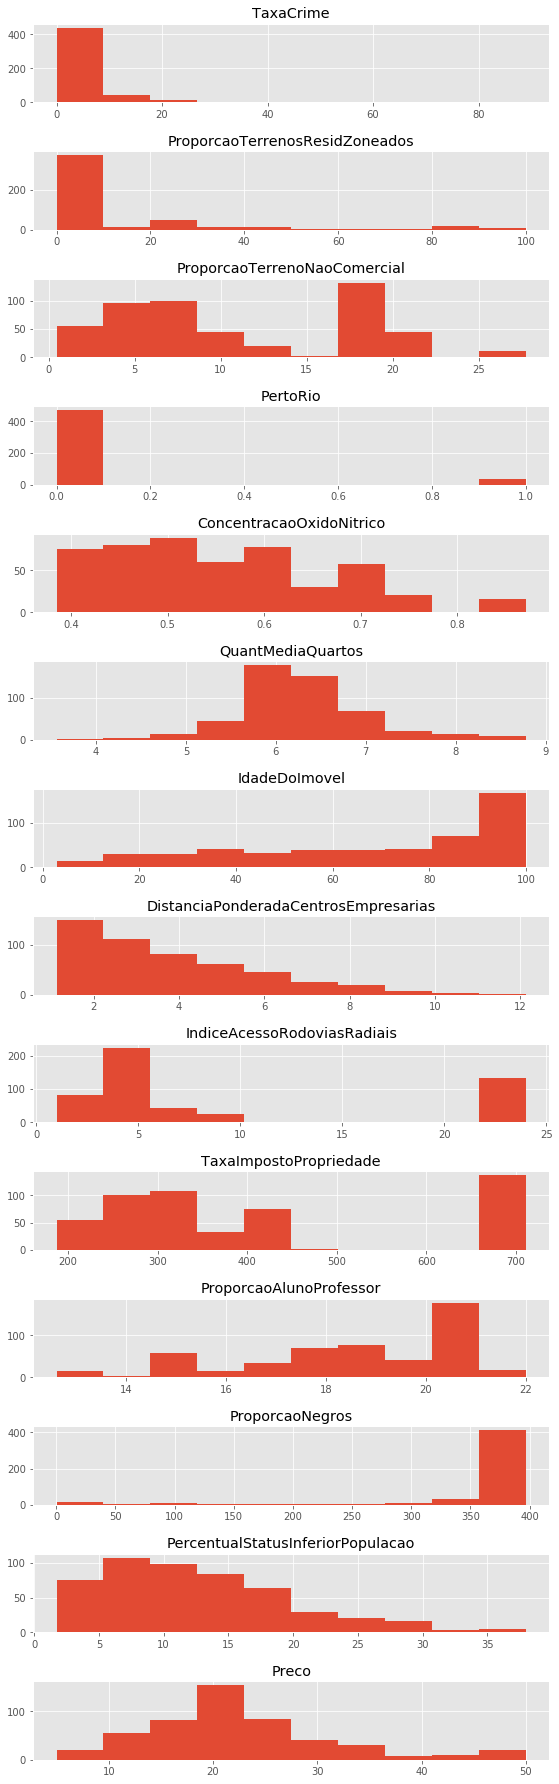

In [6]:
colunas = len(df.columns)

fig, axis = plt.subplots(nrows=colunas)
fig.set_size_inches(8,25)
for i, column in enumerate(df.columns):
    serie = df[column]
    axis[i].set(title=column)
    axis[i].hist(serie)

plt.tight_layout(pad=1.5)
plt.show()


## Outliers

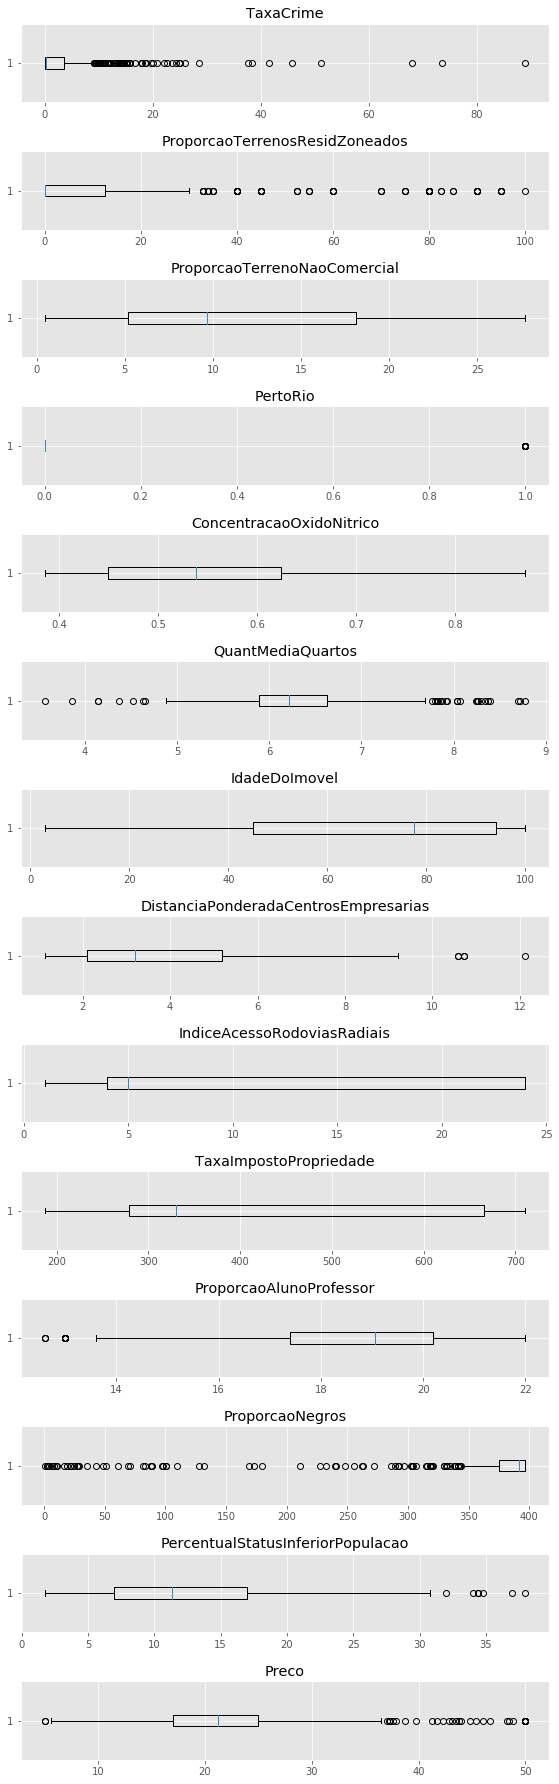

In [7]:
fig, axis = plt.subplots(nrows=colunas)
fig.set_size_inches(8,25)
for i, column in enumerate(df.columns):
    serie = df[column]
    axis[i].set(title=column)
    axis[i].boxplot(serie, vert=False)

plt.tight_layout(pad=1.5)
plt.show()

## Correlação entre as variaveis

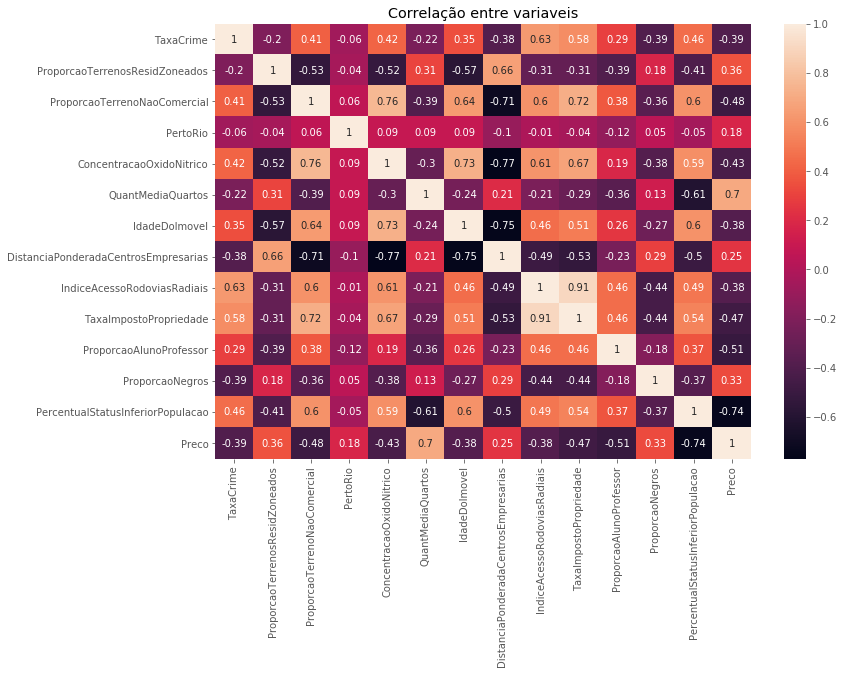

In [8]:
corr = round(df.corr(),2)
plt.title('Correlação entre variaveis')
sns.heatmap(corr, annot=True)

In [9]:
corr.describe()

,TaxaCrime,ProporcaoTerrenosResidZoneados,ProporcaoTerrenoNaoComercial,PertoRio,ConcentracaoOxidoNitrico,QuantMediaQuartos,IdadeDoImovel,DistanciaPonderadaCentrosEmpresarias,IndiceAcessoRodoviasRadiais,TaxaImpostoPropriedade,ProporcaoAlunoProfessor,ProporcaoNegros,PercentualStatusInferiorPopulacao,Preco
count,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.178571,-0.05500,0.192857,0.081429,0.190000,-0.012857,0.173571,-0.146429,0.237143,0.236429,0.115714,-0.060714,0.140714,-0.068571
std,0.446368,0.48687,0.576334,0.277873,0.573612,0.449862,0.534424,0.552193,0.522677,0.553987,0.424839,0.415904,0.564889,0.529323
min,-0.390000,-0.57000,-0.710000,-0.120000,-0.770000,-0.610000,-0.750000,-0.770000,-0.490000,-0.530000,-0.510000,-0.440000,-0.740000,-0.740000
25%,-0.215000,-0.40500,-0.382500,-0.047500,-0.360000,-0.297500,-0.262500,-0.522500,-0.285000,-0.305000,-0.217500,-0.377500,-0.400000,-0.460000
50%,0.320000,-0.25500,0.395000,0.020000,0.305000,-0.215000,0.305000,-0.305000,0.460000,0.485000,0.225000,-0.225000,0.415000,-0.380000
75%,0.450000,0.27750,0.630000,0.090000,0.655000,0.190000,0.577500,0.240000,0.607500,0.647500,0.377500,0.167500,0.577500,0.310000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
corr[(corr >= 0.70) & (corr != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

,ProporcaoTerrenoNaoComercial,ConcentracaoOxidoNitrico,QuantMediaQuartos,IdadeDoImovel,IndiceAcessoRodoviasRadiais,TaxaImpostoPropriedade,Preco
ProporcaoTerrenoNaoComercial,NaN,0.76,NaN,NaN,NaN,0.72,NaN
ConcentracaoOxidoNitrico,0.76,NaN,NaN,0.73,NaN,NaN,NaN
QuantMediaQuartos,NaN,NaN,NaN,NaN,NaN,NaN,0.7
IdadeDoImovel,NaN,0.73,NaN,NaN,NaN,NaN,NaN
IndiceAcessoRodoviasRadiais,NaN,NaN,NaN,NaN,NaN,0.91,NaN
TaxaImpostoPropriedade,0.72,NaN,NaN,NaN,0.91,NaN,NaN
Preco,NaN,NaN,0.7,NaN,NaN,NaN,NaN


In [11]:
corr[(corr <= -0.70) & (corr != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

,ProporcaoTerrenoNaoComercial,ConcentracaoOxidoNitrico,IdadeDoImovel,DistanciaPonderadaCentrosEmpresarias,PercentualStatusInferiorPopulacao,Preco
ProporcaoTerrenoNaoComercial,NaN,NaN,NaN,-0.71,NaN,NaN
ConcentracaoOxidoNitrico,NaN,NaN,NaN,-0.77,NaN,NaN
IdadeDoImovel,NaN,NaN,NaN,-0.75,NaN,NaN
DistanciaPonderadaCentrosEmpresarias,-0.71,-0.77,-0.75,NaN,NaN,NaN
PercentualStatusInferiorPopulacao,NaN,NaN,NaN,NaN,NaN,-0.74
Preco,NaN,NaN,NaN,NaN,-0.74,NaN


## Visualizando as correlações identificadas com maior força


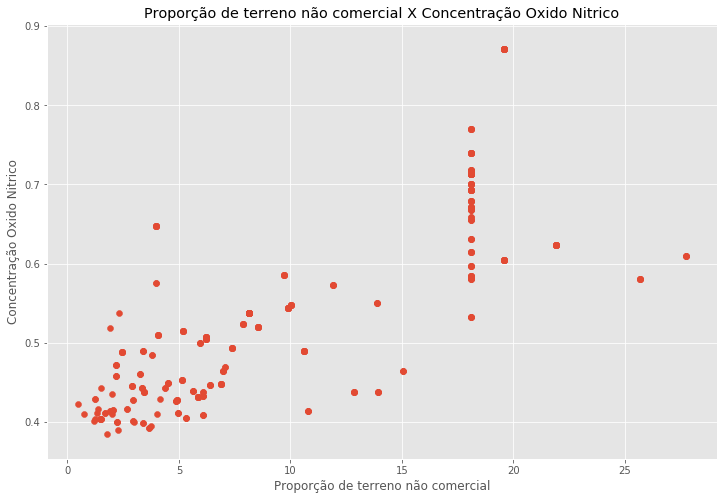

In [12]:
plt.title('Proporção de terreno não comercial X Concentração Oxido Nitrico')
plt.scatter('ProporcaoTerrenoNaoComercial', 'ConcentracaoOxidoNitrico', data=df)
plt.xlabel('Proporção de terreno não comercial')
plt.ylabel('Concentração Oxido Nitrico')
plt.show()

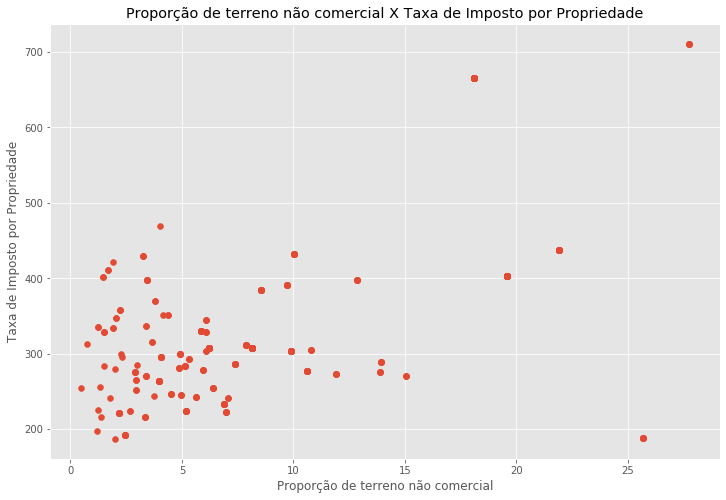

In [13]:
plt.title('Proporção de terreno não comercial X Taxa de Imposto por Propriedade')
plt.scatter('ProporcaoTerrenoNaoComercial', 'TaxaImpostoPropriedade', data=df)
plt.xlabel('Proporção de terreno não comercial')
plt.ylabel('Taxa de Imposto por Propriedade')
plt.show()

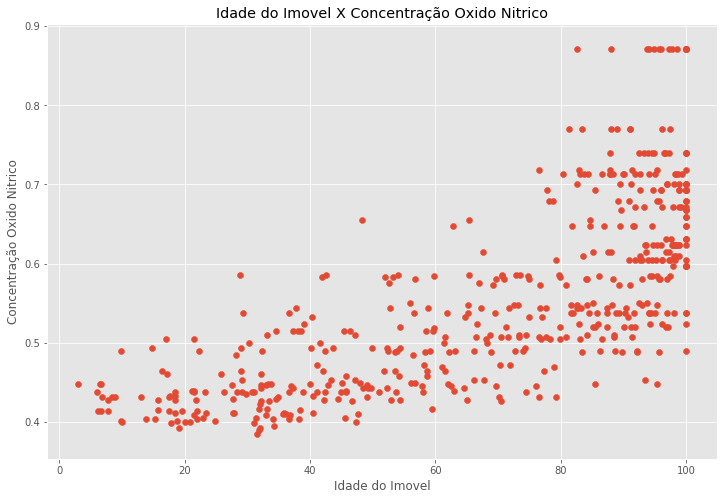

In [14]:
plt.title('Idade do Imovel X Concentração Oxido Nitrico')
plt.scatter('IdadeDoImovel', 'ConcentracaoOxidoNitrico', data=df)
plt.xlabel('Idade do Imovel')
plt.ylabel('Concentração Oxido Nitrico')
plt.show()

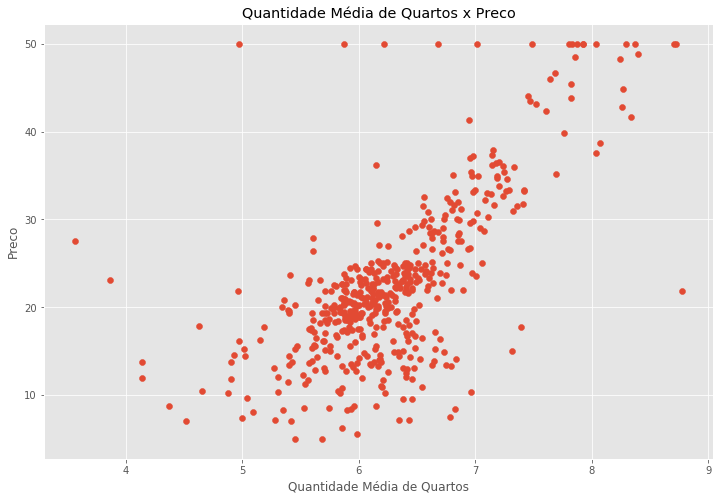

In [15]:
plt.title('Quantidade Média de Quartos x Preco')
plt.scatter('QuantMediaQuartos', 'Preco', data=df)
plt.xlabel('Quantidade Média de Quartos')
plt.ylabel('Preco')
plt.show()

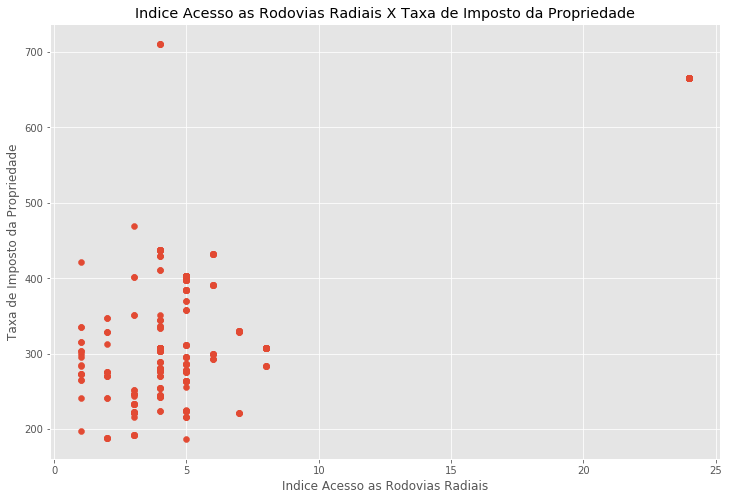

In [16]:
plt.title('Indice Acesso as Rodovias Radiais X Taxa de Imposto da Propriedade')
plt.scatter('IndiceAcessoRodoviasRadiais', 'TaxaImpostoPropriedade', data=df)
plt.xlabel('Indice Acesso as Rodovias Radiais')
plt.ylabel('Taxa de Imposto da Propriedade')
plt.show()

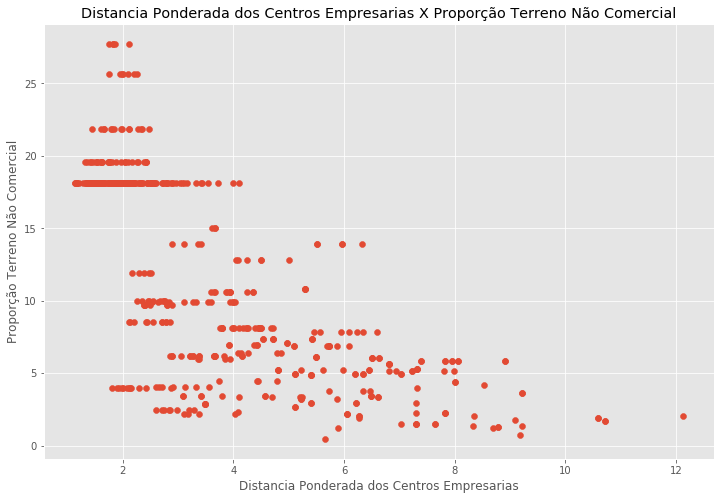

In [17]:
plt.title('Distancia Ponderada dos Centros Empresarias X Proporção Terreno Não Comercial')
plt.scatter('DistanciaPonderadaCentrosEmpresarias', 'ProporcaoTerrenoNaoComercial', data=df)
plt.ylabel('Proporção Terreno Não Comercial')
plt.xlabel('Distancia Ponderada dos Centros Empresarias')
plt.show()

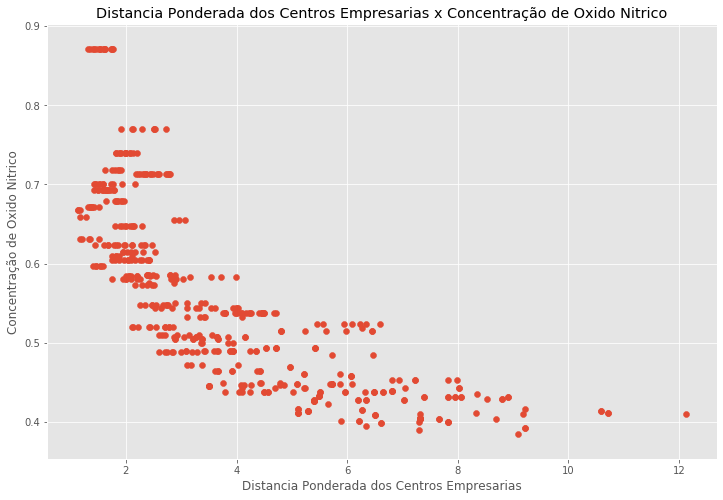

In [18]:
plt.title('Distancia Ponderada dos Centros Empresarias x Concentração de Oxido Nitrico')
plt.scatter('DistanciaPonderadaCentrosEmpresarias', 'ConcentracaoOxidoNitrico', data=df)
plt.xlabel('Distancia Ponderada dos Centros Empresarias')
plt.ylabel('Concentração de Oxido Nitrico')
plt.show()

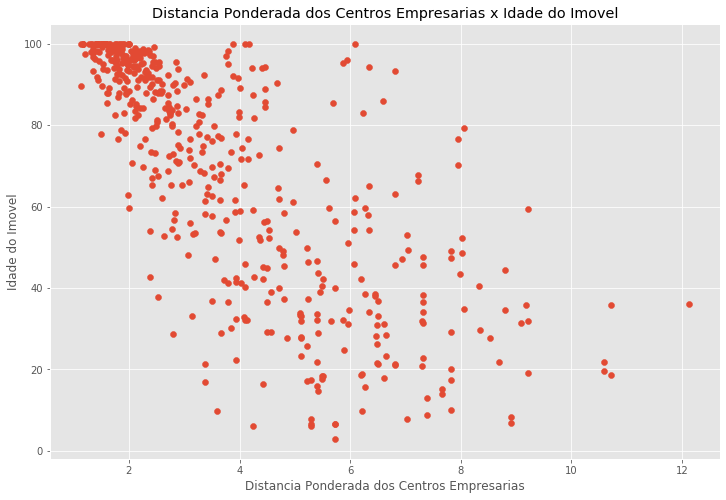

In [19]:
plt.title('Distancia Ponderada dos Centros Empresarias x Idade do Imovel')
plt.scatter('DistanciaPonderadaCentrosEmpresarias', 'IdadeDoImovel', data=df)
plt.xlabel('Distancia Ponderada dos Centros Empresarias')
plt.ylabel('Idade do Imovel')
plt.show()


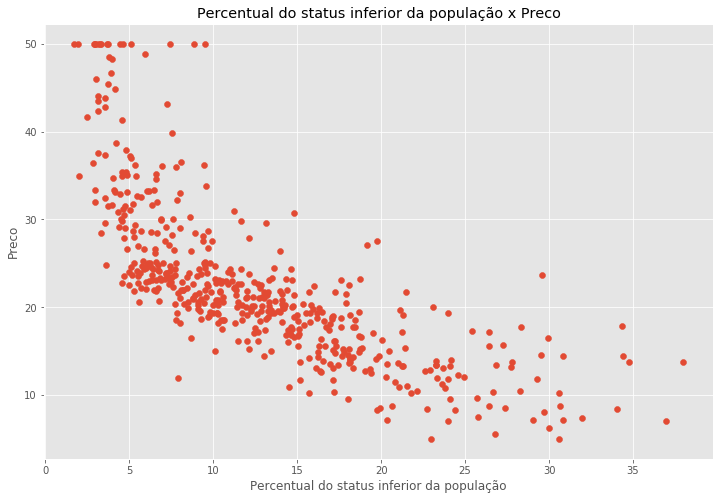

In [20]:
plt.title('Percentual do status inferior da população x Preco')
plt.scatter('PercentualStatusInferiorPopulacao', 'Preco', data=df)
plt.xlabel('Percentual do status inferior da população')
plt.ylabel('Preco')
plt.show()

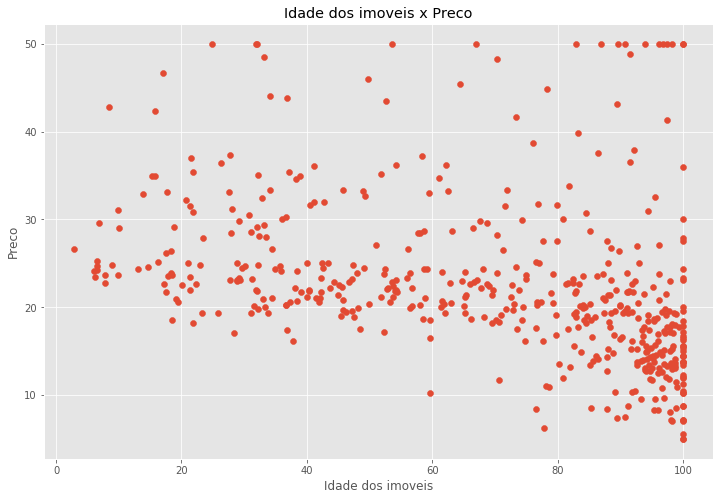

In [21]:
plt.title('Idade dos imoveis x Preco')
plt.scatter('IdadeDoImovel', 'Preco', data=df)
plt.xlabel('Idade dos imoveis')
plt.ylabel('Preco')
plt.show()